Abhay Singh

Email: abhay.s-26@scds.saiuniversity.edu.in

School of Computing and Data Science

### Hutton Rock Dataset

####Total Number of images: 505

- The number of images in granite class are: 187
- The number of images in basalt class are: 130
- The number of images in coal class are: 85
- The number of images in andesite class are: 103

###378 images are used for trining and 127 images are used for testing.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.17.1


In [3]:
from numpy import load

X_train_std = load('/content/drive/MyDrive/DLPROJECT/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/DLPROJECT/X_test_std.npy')

y_train = load('/content/drive/MyDrive/DLPROJECT/y_train.npy')
y_test = load('/content/drive/MyDrive/DLPROJECT/y_test.npy')

In [4]:
ConvNeXtTiny=keras.applications.ConvNeXtTiny(
    include_top=False,
)

111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [5]:
base_model3_TL = keras.applications.DenseNet201(weights='imagenet',
                                                  include_top=False)
for layer in base_model3_TL.layers:
  layer.trainabe = False

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
# Adding classifier

global_pool = keras.layers.GlobalAveragePooling2D()(base_model3_TL.output)

Drop_out = keras.layers.Dropout(rate=0.15)(global_pool)

output_ = keras.layers.Dense(units=4, activation='softmax')(Drop_out)


model3_TL = keras.models.Model(inputs=[base_model3_TL.input], outputs=[output_])

In [7]:
model3_TL.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, None, None, 3)  │              0 │ input_layer_5[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, None, None, 64) │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, None, None, 64) │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, None, None, 64) │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None,     │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None,     │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None,     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 32) │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, None, None, 96) │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 18,329,668 (69.92 MB)

 Trainable params: 18,100,612 (69.05 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [8]:
model3_TL.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

callbacks_TL = [
             keras.callbacks.ModelCheckpoint("bestTL3.weights.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)]

history_TL3 = model3_TL.fit(x = X_train_std, y = y_train, epochs=10,
                          validation_split=0.1, batch_size=32, callbacks=callbacks_TL)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 830s 40s/step - accuracy: 0.5363 - loss: 1.3094 - val_accuracy: 0.4359 - val_loss: 80.5229
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 756ms/step - accuracy: 0.6388 - loss: 0.9866 - val_accuracy: 0.3333 - val_loss: 1506.2859
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 749ms/step - accuracy: 0.7656 - loss: 0.6408 - val_accuracy: 0.3590 - val_loss: 276.5112
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 754ms/step - accuracy: 0.8198 - loss: 0.4295 - val_accuracy: 0.2308 - val_loss: 17.3383
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 756ms/step - accuracy: 0.8702 - loss: 0.3419 - val_accuracy: 0.3590 - val_loss: 45.9896
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 753ms/step - accuracy: 0.8723 - loss: 0.3539 - val_accuracy: 0.3590 - val_loss: 146.7544
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8637 - loss: 0.3265 - val_accuracy: 0.4615 - val_loss: 271.4401
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 984ms/step - accuracy: 0.8867 - loss: 0.3292 - va

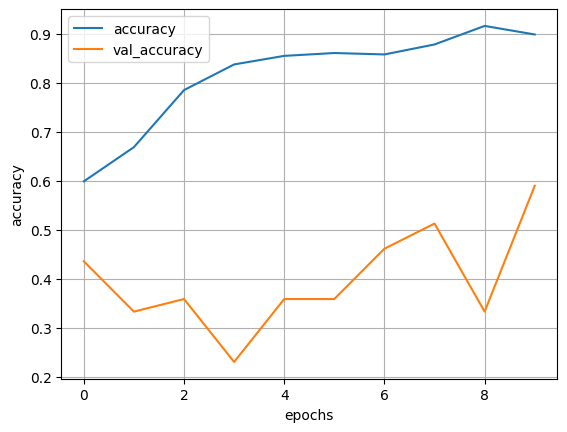

In [9]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_TL3.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [10]:
model3_TL.load_weights("bestTL3.weights.h5")

In [11]:
model3_TL.save('/content/drive/MyDrive/DLPROJECT/01_ConvNeXtTiny_TransferLearning_Best_Model.keras')